In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../1. 상위변수_데이터/행정동_음주운전_합본_cp949.csv', encoding = 'cp949')

In [2]:
data.head()

,읍면동,자동차 등록 대수,인구수,횡단보도 개수,음식점 수,버스정류장 개수,음주 교통사고 건수,음주운전 적발 건수
0,가덕도동,2327,3941,4,25,88,1.14,0.66
1,가락동,2095,2345,33,12,57,0.68,0.40
2,가야1동,5540,19224,14,36,13,5.42,2.65
3,가야2동,5540,16844,8,43,18,4.75,2.32
4,감만1동,7514,12970,14,25,40,1.37,1.37


In [3]:
X = data.drop(columns = ['읍면동', '음주운전 적발 건수'])
y = data['음주운전 적발 건수']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
RF = RandomForestRegressor(random_state=29)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
RF_mse = mean_squared_error(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(y_test, y_pred)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error (MSE): {RF_mse}")
print(f"Mean Absolute Error (MAE): {RF_mae}")
print(f"Root Mean Squared Error (RMSE): {RF_rmse}")
print(f"R2 Score: {RF_r2}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 0.34147109023151173
Mean Absolute Error (MAE): 0.3856300887399589
Root Mean Squared Error (RMSE): 0.5843552774053741
R2 Score: 0.9486521827545724


In [18]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Support Vector Machine Model
svm_model = SVR()

# Define the parameter grid for SVM hyperparameter tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 15],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Perform GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Best parameters and model for SVM
best_svm_params = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Predict with the best SVM model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the SVM model
SVM_mse = mean_squared_error(y_test, y_pred_svm)
SVM_mae = mean_absolute_error(y_test, y_pred_svm)
SVM_rmse = np.sqrt(SVM_mse)
SVM_r2 = r2_score(y_test, y_pred_svm)

# Print SVM results
print(f"SVM Best Parameters: {best_svm_params}")
print(f"SVM Mean Squared Error (MSE): {SVM_mse}")
print(f"SVM Mean Absolute Error (MAE): {SVM_mae}")
print(f"SVM Root Mean Squared Error (RMSE): {SVM_rmse}")
print(f"SVM R2 Score: {SVM_r2}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
SVM Best Parameters: {'C': 15, 'gamma': 'scale', 'kernel': 'linear'}
SVM Mean Squared Error (MSE): 0.9794210858870763
SVM Mean Absolute Error (MAE): 0.516697216860175
SVM Root Mean Squared Error (RMSE): 0.9896570546846399
SVM R2 Score: 0.8527221297406135


In [ ]:
!pip install lightgbm

In [19]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# LightGBM Model
LGBM = lgb.LGBMRegressor()

# Define the parameter grid for LightGBM hyperparameter tuning
lgbm_param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30]
}

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Perform GridSearchCV for LightGBM
grid_search_lgbm = GridSearchCV(estimator=LGBM, param_grid=lgbm_param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search_lgbm.fit(X_train, y_train)

# Best parameters and model for LightGBM
best_lgbm_params = grid_search_lgbm.best_params_
best_lgbm_model = grid_search_lgbm.best_estimator_

# Predict with the best LightGBM model
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Evaluate the LightGBM model
LGBM_mse = mean_squared_error(y_test, y_pred_lgbm)
LGBM_mae = mean_absolute_error(y_test, y_pred_lgbm)
LGBM_rmse = np.sqrt(LGBM_mse)
LGBM_r2 = r2_score(y_test, y_pred_lgbm)

# Print LightGBM results
print(f"LightGBM Best Parameters: {best_lgbm_params}")
print(f"LightGBM Mean Squared Error (MSE): {LGBM_mse}")
print(f"LightGBM Mean Absolute Error (MAE): {LGBM_mae}")
print(f"LightGBM Root Mean Squared Error (RMSE): {LGBM_rmse}")
print(f"LightGBM R2 Score: {LGBM_r2}")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 6
[LightGBM] [Info] Start training from score 2.515955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
pip install --upgrade xgboost


In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initial Parameter grid
params = {
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'learning_rate': 0.01,  # Lower learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'min_child_weight': 3,
    'alpha': 0.1,
    'lambda': 1,
    'seed': 29
}

# Perform Cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    nfold=5,
    metrics="rmse",
    early_stopping_rounds=20,
    as_pandas=True,
    seed=29
)

# Train the model with the best number of boosting rounds
best_num_boost_round = cv_results['test-rmse-mean'].idxmin()
final_model = xgb.train(params, dtrain, num_boost_round=best_num_boost_round)

# Predict and evaluate
y_pred_xgb = final_model.predict(dtest)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Print evaluation results
print(f"XGBoost Mean Squared Error (MSE): {xgb_mse}")
print(f"XGBoost Mean Absolute Error (MAE): {xgb_mae}")
print(f"XGBoost Root Mean Squared Error (RMSE): {xgb_rmse}")
print(f"XGBoost R2 Score: {xgb_r2}")



XGBoost Mean Squared Error (MSE): 0.19005237344687423
XGBoost Mean Absolute Error (MAE): 0.3177558988478125
XGBoost Root Mean Squared Error (RMSE): 0.43594996667837266
XGBoost R2 Score: 0.9714213741134174


In [52]:
from joblib import dump, load

# 모델 저장
dump(final_model, 'xgb_model.joblib')
print("모델이 'xgb_model.joblib'에 저장되었습니다.")

# 모델 로드
xgb_loaded = load('xgb_model.joblib')
print("저장된 모델이 로드되었습니다.")


모델이 'xgb_model.joblib'에 저장되었습니다.
저장된 모델이 로드되었습니다.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Preprocess: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
LR_model = LinearRegression()

# Define the parameter grid for Linear Regression hyperparameter tuning
lr_param_grid = {
    'fit_intercept': [True, False]
}

# Perform GridSearchCV for Linear Regression
kfold = KFold(n_splits=5, shuffle=True, random_state=29)
grid_search_lr = GridSearchCV(estimator=LR_model, param_grid=lr_param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters and model for Linear Regression
best_lr_params = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_

# Save the Linear Regression model
joblib.dump(best_lr_model, 'best_lr_model.pkl')

# Predict with the best Linear Regression model
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
LR_mse = mean_squared_error(y_test, y_pred_lr)
LR_mae = mean_absolute_error(y_test, y_pred_lr)
LR_rmse = np.sqrt(LR_mse)
LR_r2 = r2_score(y_test, y_pred_lr)

# Print Linear Regression results
print(f"Linear Regression Best Parameters: {best_lr_params}")
print(f"Linear Regression Mean Squared Error (MSE): {LR_mse}")
print(f"Linear Regression Mean Absolute Error (MAE): {LR_mae}")
print(f"Linear Regression Root Mean Squared Error (RMSE): {LR_rmse}")
print(f"Linear Regression R2 Score: {LR_r2}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression Best Parameters: {'fit_intercept': True}
Linear Regression Mean Squared Error (MSE): 0.6104039914674821
Linear Regression Mean Absolute Error (MAE): 0.5516500331268138
Linear Regression Root Mean Squared Error (RMSE): 0.781283553818639
Linear Regression R2 Score: 0.9082121049295803


In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize metrics
DL_mae, DL_mse, DL_rmse, DL_r2 = [], [], [], []

for train_idx, val_idx in kfold.split(X_scaled):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Define the model
    model_deep = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    model_deep.compile(optimizer='adam', loss='mae', metrics=['mse', 'mae'])

    # Early stopping
    es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)

    # Train the model
    model_deep.fit(X_train, y_train,
                   validation_data=(X_val, y_val),
                   epochs=50,
                   batch_size=1,
                   callbacks=[es],
                   verbose=1)

    # Predict on validation set
    y_pred = model_deep.predict(X_val)

    # Evaluate the model
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    # Store the metrics
    DL_mae.append(mae)
    DL_mse.append(mse)
    DL_rmse.append(rmse)
    DL_r2.append(r2)

# Replace metrics lists with their average values
DL_mae = np.mean(DL_mae)
DL_mse = np.mean(DL_mse)
DL_rmse = np.mean(DL_rmse)
DL_r2 = np.mean(DL_r2)

# Print averaged metrics
print(f"Average MAE: {DL_mae:.4f}")
print(f"Average MSE: {DL_mse:.4f}")
print(f"Average RMSE: {DL_rmse:.4f}")
print(f"Average R2: {DL_r2:.4f}")


Epoch 1/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6499 - mae: 1.6499 - mse: 5.5654 - val_loss: 0.8426 - val_mae: 0.8426 - val_mse: 1.6474
Epoch 2/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9778 - mae: 0.9778 - mse: 2.5612 - val_loss: 0.5206 - val_mae: 0.5206 - val_mse: 0.5581
Epoch 3/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8077 - mae: 0.8077 - mse: 2.6218 - val_loss: 0.7317 - val_mae: 0.7317 - val_mse: 1.5568
Epoch 4/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7476 - mae: 0.7476 - mse: 1.5457 - val_loss: 0.5249 - val_mae: 0.5249 - val_mse: 0.6717
Epoch 5/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7859 - mae: 0.7859 - mse: 1.6098 - val_loss: 0.4832 - val_mae: 0.4832 - val_mse: 0.4244
Epoch 6/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6740 - mae: 0.6740 - mse: 1.2827 - val_loss: 0.7082 - val_mae: 0.7082 - val_mse: 1.7147
Epoch 7/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8421 - mae: 0.8421 - mse: 2.4093 - val

In [66]:
print(f"MAE: {DL_mae}")
print(f"MSE: {DL_mse}")
print(f"RMSE: {DL_rmse}")
print(f"R²: {DL_r2}")

MAE: 0.5288924642694676
MSE: 1.0006544726626803
RMSE: 0.9560037785928868
R²: 0.8573359514327781


In [67]:
# Save the model
model_deep.save('model_deep.keras')

# Print confirmation
print("Model saved as 'model_deep.keras'")


Model saved as 'model_deep.keras'


In [68]:
from keras.models import load_model

# Load the model
model_deep = load_model('model_deep.keras')

# Print confirmation
print("Model loaded successfully!")


Model loaded successfully!


In [69]:
print("모델 입력 형상:", model_deep.input_shape)


모델 입력 형상: (None, 6)


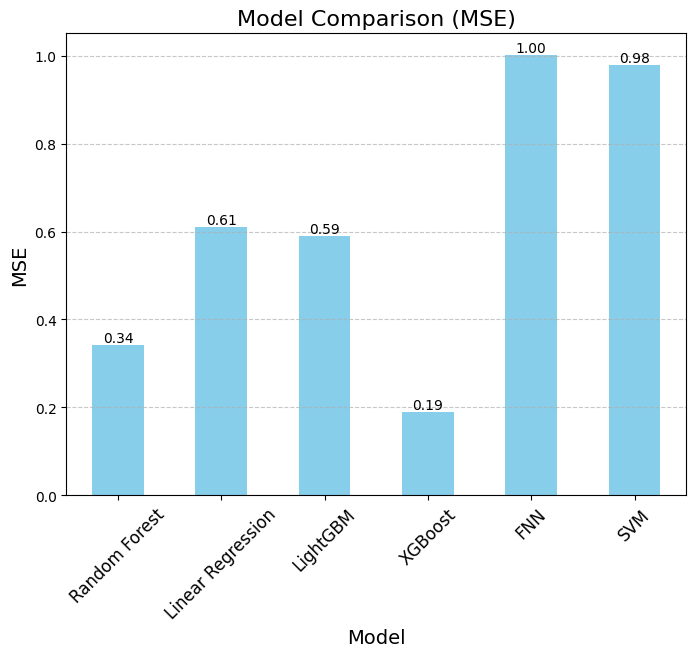

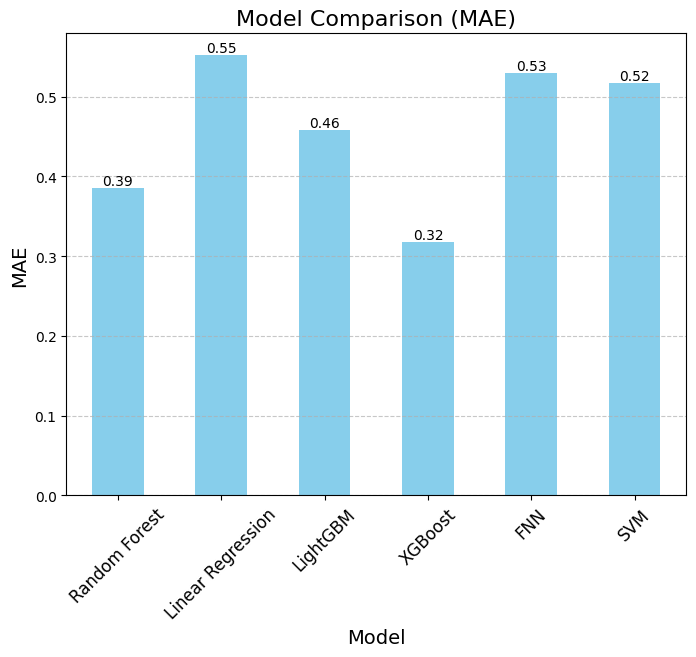

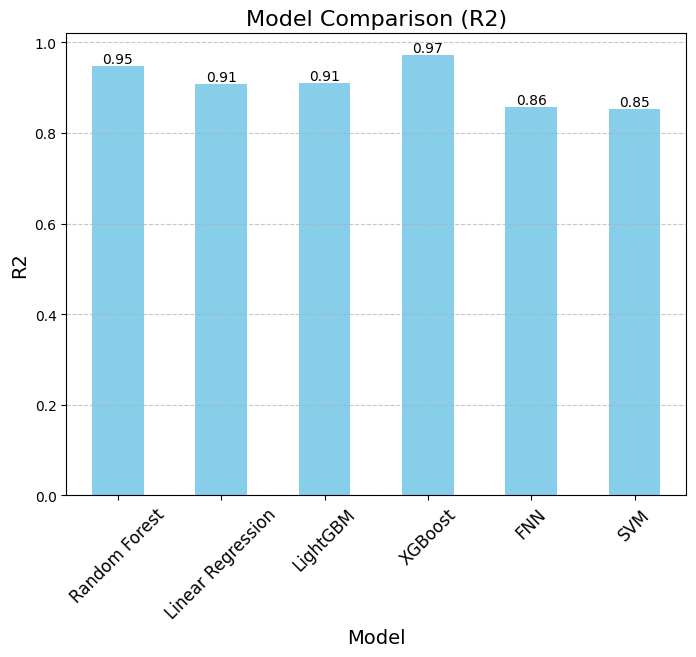

In [70]:
import matplotlib.pyplot as plt

# Model Results
model_results = {
    'Model': ['Random Forest', 'Linear Regression', 'LightGBM', 'XGBoost', 'FNN', 'SVM'],
    'MSE': [RF_mse, LR_mse, LGBM_mse, xgb_mse, DL_mse, SVM_mse],
    'MAE': [RF_mae, LR_mae, LGBM_mae, xgb_mae, DL_mae, SVM_mae],
    'R2': [RF_r2, LR_r2, LGBM_r2, xgb_r2, DL_r2, SVM_r2]
}

# DataFrame for Visualization
df_results = pd.DataFrame(model_results)

# Visualization
metrics = ['MSE', 'MAE', 'R2']
for metric in metrics:
    df_results.plot(x='Model', y=metric, kind='bar', legend=False, figsize=(8, 6), color='skyblue')
    plt.title(f'Model Comparison ({metric})', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on bars
    for index, value in enumerate(df_results[metric]):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Save the plot as an image
    plt.savefig(f'model_comparison_{metric}_new.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

## 결과 분석 및 해석:

- R² (결정 계수):

K-fold 교차 검증 결과, **Random Forest (0.95)**와 **XGBoost (0.97)**가 높은 R² 값을 보였으며, 이는 타겟 변수(음주운전 적발 건수)의 변동성을 매우 잘 설명한다는 것을 의미합니다.
**Linear Regression (0.91)**, **LightGBM (0.91)**도 높은 성능을 보였지만, Deep Learning과 SVM은 비교적 낮은 성능을 보였습니다.


- MSE (Mean Squared Error):

**XGBoost (0.19)**가 가장 낮은 MSE 값을 보여 음주운전 적발 건수를 예측하는 데 매우 적합합니다.
반면, **Deep Learning (1.00)**과 **SVM (0.98)**은 오차가 크며, 음주운전 적발 건수를 예측하는 데 부적합할 가능성이 큽니다.


- MAE (Mean Absolute Error):

**Random Forest (0.39)**와 **XGBoost (0.32)**가 낮은 MAE 값을 보여 평균적으로 타겟 값과 예측 값 간의 차이가 작음을 나타냅니다.
**Deep Learning (0.55)**, **Deep Learning (0.53)**과 **SVM (0.52)**은 높은 MAE 값을 보여 예측이 정확하지 않음을 시사합니다.



## 결론 및 추천 모델:

XGBoost도는 R², MSE, MAE의 모든 지표에서 가장 좋은 성능을 보여, 음주운전 적발 건수를 예측하는 데 가장 적합한 모델입니다.

Random Forest도 유사한 성능을 보이며, XGBoost와 비슷하게 높은 예측 정확도를 기대할 수 있습니다.

Deep Learning과 SVM은 성능이 낮아 음주운전 적발 건수 예측에 적합하지 않습니다.
다음 단계:

Random Forest 또는 XGBoost를 사용하여 음주운전 적발 건수를 예측하는 작업을 진행하는 것이 적합합니다.

이 두 모델 중 선택은:
모델 해석 가능성이 중요하면 Random Forest.
대규모 데이터나 빠른 학습이 중요하면 XGBoost.

추가로 새로운 데이터를 기반으로 예측 결과를 확인하고 실무에 활용할 수 있습니다.